# K-Nearest Neighboor

In [1]:
import numpy as np

set1 = np.linspace(0, 5, 50)
set1_y = np.random.randn(len(set1))
set2 = np.linspace(3, 7, 50)
set2_y = np.random.randn(len(set1))

X = 3
Y = -2

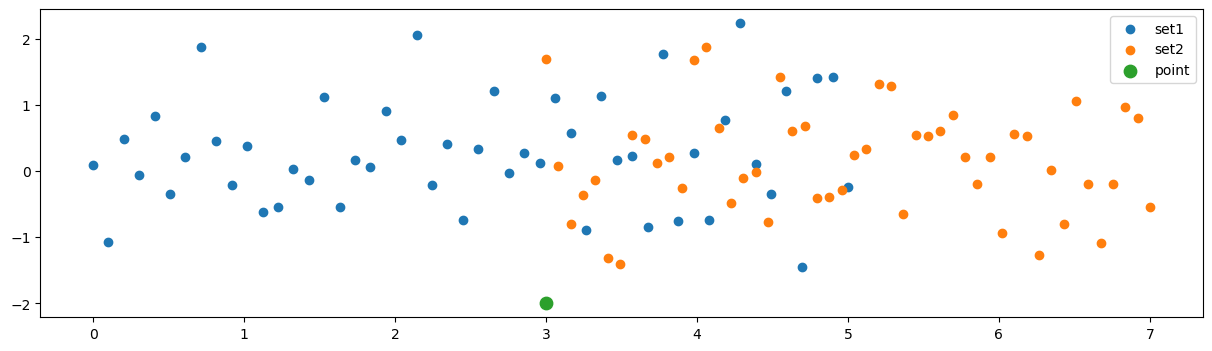

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,4))
plt.scatter(set1, set1_y, label = 'set1')
plt.scatter(set2, set2_y, label = 'set2')
plt.scatter(X, Y, label = 'point', s = 80)
plt.legend()
plt.show()

In [3]:
lst_points = []

for i in range(len(set1)):
    lst_points.append((set1[i], set1_y[i]))

## Euclidean distance between two points

$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

## For k = 1  (Only for one set)

In [4]:
all_distance =[]

for i in range(len(lst_points)):
    distance = np.sqrt((X - lst_points[i][0]) **2 + (Y - lst_points[i][1]) **2)
    all_distance.append(distance)
    
min_distance = np.random.randint(100, 150, 1)
index = 0

for i, element in enumerate(all_distance):
    if element < min_distance :
        min_distance = element
        index = i

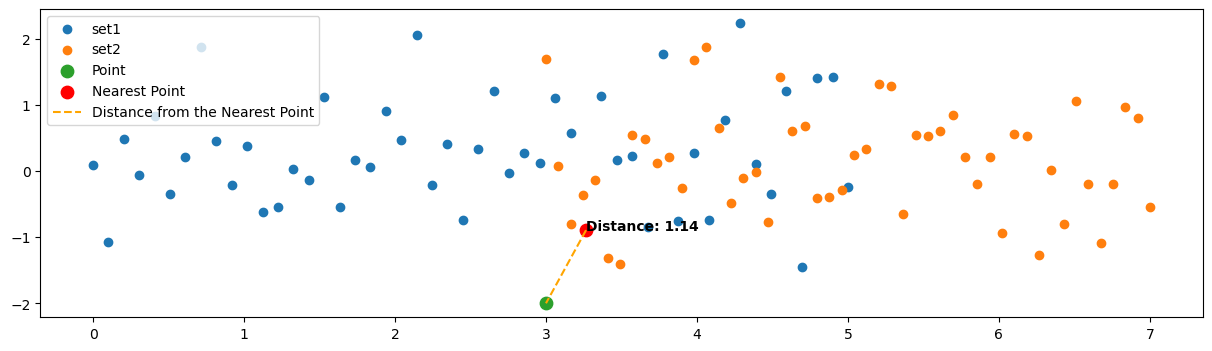

In [5]:
plt.figure(figsize = (15,4))
plt.scatter(set1, set1_y, label = 'set1')
plt.scatter(set2, set2_y, label = 'set2')
plt.scatter(X, Y, label = 'Point', s = 80)
plt.scatter(lst_points[index][0], lst_points[index][1], marker = 'o', label = 'Nearest Point', color = 'red', s = 80)
plt.plot((lst_points[index][0], X), (lst_points[index][1], Y), label = 'Distance from the Nearest Point', ls = '--', color = 'orange')
plt.annotate(f'Distance: {round(min_distance, 2)}', xy = (lst_points[index][0], lst_points[index][1]), 
                 fontweight = 'bold', color = 'black')
plt.legend()
plt.show()

## For k > 1

In [6]:
k = 7

# sorted the list
k_smaller_distance = sorted(all_distance)[:k]

# sorted the index
k_smaller_index = np.argsort(all_distance)[:k]

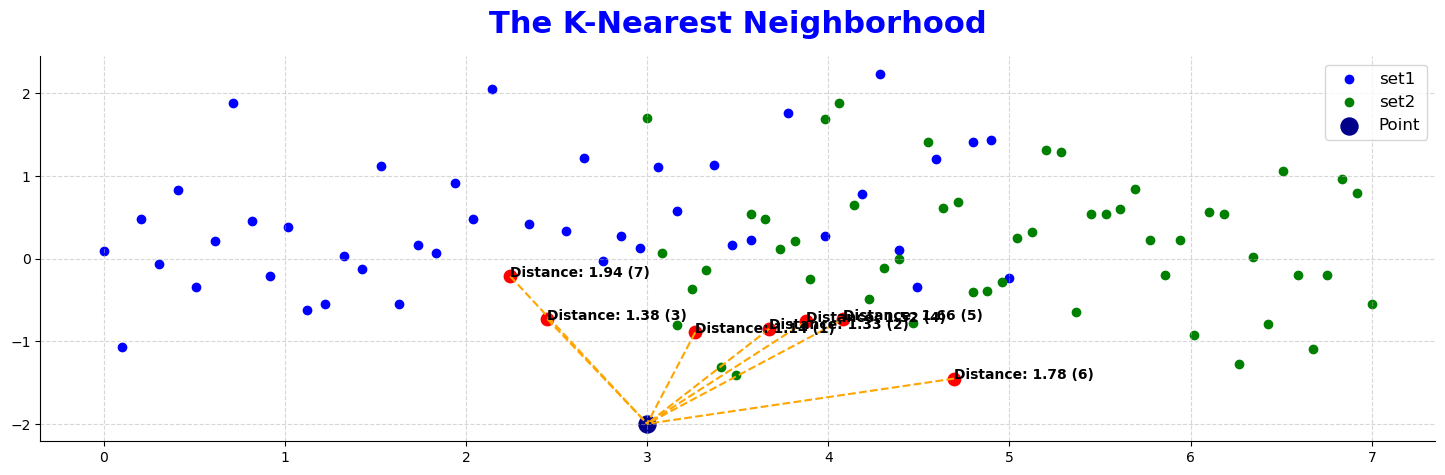

In [7]:
plt.figure(figsize = (18,5))
plt.scatter(set1, set1_y, label = 'set1', color = 'blue')
plt.scatter(set2, set2_y, label = 'set2', color = 'green')
plt.scatter(X, Y, label = 'Point', s = 150, color = 'darkblue')

for i in range (k):
    
    plt.scatter(lst_points[k_smaller_index[i]][0], lst_points[k_smaller_index[i]][1], marker = 'o', color = 'red', s = 80)
    plt.plot((lst_points[k_smaller_index[i]][0], X), (lst_points[k_smaller_index[i]][1], Y), ls = '--', color = 'orange')
    plt.annotate(f'Distance: {round(k_smaller_distance[i], 2)} ({i + 1})', xy = (lst_points[k_smaller_index[i]][0], lst_points[k_smaller_index[i]][1]), 
                 fontweight = 'bold', color = 'black')
plt.legend(fontsize = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, ls = '--', alpha = 0.5)
plt.title('The K-Nearest Neighborhood', fontweight = 'bold', fontsize = 22, y =1.04, color = 'blue')
plt.show()

## Minimum distance of Both Set

In [8]:
# concat the two list of points into one list
lst_point_set_one = []
lst_point_set_two = []


for i in range(len(set1)):
    lst_point_set_one.append((set1[i], set1_y[i]))
    
for i in range(len(set2)):
    lst_point_set_two.append((set2[i], set2_y[i]))

In [9]:
lst_point_set1 = lst_point_set_one.copy()
lst_point_set2 = lst_point_set_two.copy()

for i, element in enumerate(lst_point_set2):
    lst_point_set1.insert(len(lst_point_set1) + 1, element)

In [10]:
len(lst_point_set1) == len(set1) + len(set2)

True

In [11]:
all_distance_both =[]
k = 7

for i in range(len(lst_point_set1)):
    distance = np.sqrt((X - lst_point_set1[i][0]) **2 + (Y - lst_point_set1[i][1]) **2)
    all_distance_both.append(distance)
    
# sorted the list
k_smaller_distance2 = sorted(all_distance_both)[:k]

# sorted the index
k_smaller_index2 = np.argsort(all_distance_both)[:k]

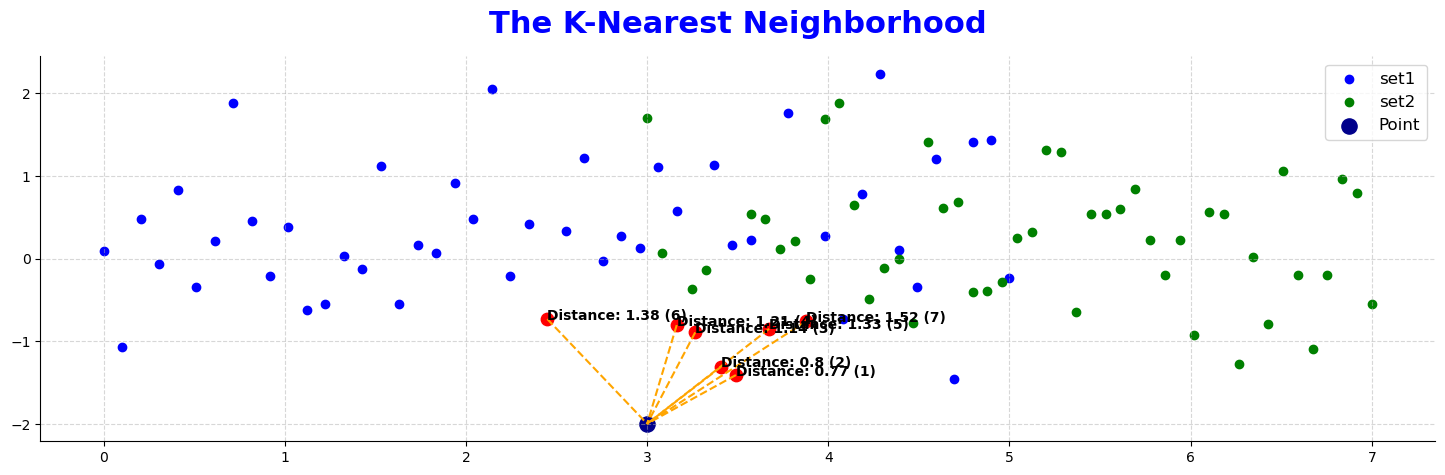

In [12]:
plt.figure(figsize = (18,5))
plt.scatter(set1, set1_y, label = 'set1', color = 'blue')
plt.scatter(set2, set2_y, label = 'set2', color = 'green')
plt.scatter(X, Y, label = 'Point', s = 120, color = 'darkblue')

for i in range (k):
    
    plt.scatter(lst_point_set1[k_smaller_index2[i]][0], lst_point_set1[k_smaller_index2[i]][1], marker = 'o', color = 'red', s = 80)
    plt.plot((lst_point_set1[k_smaller_index2[i]][0], X), (lst_point_set1[k_smaller_index2[i]][1], Y), ls = '--', color = 'orange')
    plt.annotate(f'Distance: {round(k_smaller_distance2[i], 2)} ({i + 1})', xy = (lst_point_set1[k_smaller_index2[i]][0],
                                                                                  lst_point_set1[k_smaller_index2[i]][1]), fontweight = 'bold', color = 'black')
plt.legend(fontsize = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, ls = '--', alpha = 0.5)
plt.title('The K-Nearest Neighborhood', fontweight = 'bold', fontsize = 22, y =1.04, color = 'blue')
plt.show()

In [13]:
# Count how many points are from each set
count_set1 = 0
count_set2 = 0

for i in range(len(k_smaller_index2)):
    
    if lst_point_set1[k_smaller_index2[i]] in lst_point_set_one:
        count_set1 += 1
    else:
        count_set2 += 1

In [14]:
print(f'The given point is close to {count_set1} points from set 1.\nThe probability of its belonging to class 1 is: {round(count_set1 / (count_set1 + count_set2), 2)}%\n')
print(f'The given point is close to {count_set2} points from set 2.\nThe probability of its belonging to class 2 is: {round(count_set2 / (count_set1 + count_set2), 2)}%')

The given point is close to 4 points from set 1.
The probability of its belonging to class 1 is: 0.57%

The given point is close to 3 points from set 2.
The probability of its belonging to class 2 is: 0.43%
